# Project: Investigate a Dataset - No-show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description

> This dataset collects information from 100k medical appointments in Brazil focused on whether the patient showed up for their appointment or were a no-show for their appointment. This dataset also provides medical attributes for each patient.

|     Feature    |                            Description                            |
|:--------------:|:-----------------------------------------------------------------:|
| PatientID      |                    Identification of a patient                    |
| AppointmentID  |                 Identification of each appointment                |
| Gender         |                       M = Male \| F = Female                      |
| ScheduledDay   |             Date when the appointment was scheduled.              |
| AppointmentDay |                        Date of appointment                        |
| Age            |                         Age of the patient                        |
| Neigbourhood   |           Location of where the appointment takes place           |
| Scholarship    | Indicates if the patient is enrolled in Brasilian welfare program |
| Hipertension   |                    If patient has hipertension                    |
| Diabetes       |                      If patient has diabetes                      |
| Alcoholism     |                     If patient has alcoholism                     |
| Handcap        |                    If patient has special needs                   |
| SMS_received   |                If SMS reminder was sent to patient                |
| No-show        |               No: Showed up \| Yes: Did not show up  |hat to explore.

### Question(s) for Analysis

- Which gender missed the highest percentage of appointments?
- Which days of the week have the highest percentage of missed appointments?
- Which age group has the highest percentage of missed appointments?

### Import necessary libraries

In [1]:
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

### Read in csv file

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

<a id='wrangling'></a>
## Data Wrangling

### Explore the dataset

In [3]:
# Find number of rows and columns as tuple (rows, columns)
df.shape

(110527, 14)

In [4]:
# Quick check on the top of the dataset
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
# Quick check on bottom of the dataset
df.tail(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [6]:
# Check info on data such as index, column names, non-null counts, and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


ScheduledDay and AppointmentDay are both object types and will need to be converted to DateTime format

This also shows that there is no missing data in any of the columns

In [7]:
# Convert ScheduledDay and AppointmentDay to DateTime format
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [8]:
# Change float values to not have any values after the decimal
pd.set_option('display.float_format', lambda x: '%.0f' % x)

In [9]:
# Get a summary statistics of the data for all the columns 
df.describe(include='all')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,110527,110527,110527,110527,110527,110527,110527,110527,110527,110527,110527,110527,110527,110527
unique,NaN,NaN,2,NaN,NaN,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,F,NaN,NaN,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,71840,NaN,NaN,NaN,7717,NaN,NaN,NaN,NaN,NaN,NaN,88208
mean,147496265710394,5675305,NaN,2016-05-09 07:49:15.846273024+00:00,2016-05-19 00:57:50.008233472+00:00,37,NaN,0,0,0,0,0,0,NaN
min,39218,5030230,NaN,2015-11-10 07:13:56+00:00,2016-04-29 00:00:00+00:00,-1,NaN,0,0,0,0,0,0,NaN
25%,4172614444192,5640286,NaN,2016-04-29 10:27:01+00:00,2016-05-09 00:00:00+00:00,18,NaN,0,0,0,0,0,0,NaN
50%,31731838713978,5680573,NaN,2016-05-10 12:13:17+00:00,2016-05-18 00:00:00+00:00,37,NaN,0,0,0,0,0,0,NaN
75%,94391720898175,5725524,NaN,2016-05-20 11:18:37+00:00,2016-05-31 00:00:00+00:00,55,NaN,0,0,0,0,0,1,NaN
max,999981631772427,5790484,NaN,2016-06-08 20:07:23+00:00,2016-06-08 00:00:00+00:00,115,NaN,1,1,1,1,4,1,NaN


Females make up the majority of the patients with appointments

Min age is -1, this will need to be cleaned up. Max age is 115 which is possible so that will be left.

81 unique Neighbourhoods and JARDIM CAMBURI has the most appointments (7,717 appointments at this location)

In [10]:
# Count duplicated rows
df.duplicated().sum()

0

In [11]:
def check_for_dupes(data, col):
    """
    Checks for duplicate values in each column of a dataset (dupe or dupes)
    Returns column name, number of duplicated values, and list of duplicated values with frequency of each value (if applicable)
    """
    dupe_count = data[col].duplicated().sum()
    if dupe_count == 0:
        return f'{col} has {dupe_count} dupes\n'
    elif dupe_count == 1:
        return f'{col} has {dupe_count} dupe:\n{data[col].value_counts()}\n'
    else:
        return f'{col} has {dupe_count} dupes:\n{data[col].value_counts()}\n'

In [12]:
# Print out the duplicate values for each column in the data set
for col in df.columns:
    print(check_for_dupes(df, col), '\n', '--------------------------------------------', '\n')

PatientId has 48228 dupes:
PatientId
822145925426128    88
99637671331        84
26886125921145     70
33534783483176     65
6264198675331      62
                   ..
862263621811        1
9267587227475       1
5764355598913       1
5712491287569       1
15576631729893      1
Name: count, Length: 62299, dtype: int64
 
 -------------------------------------------- 

AppointmentID has 0 dupes
 
 -------------------------------------------- 

Gender has 110525 dupes:
Gender
F    71840
M    38687
Name: count, dtype: int64
 
 -------------------------------------------- 

ScheduledDay has 6978 dupes:
ScheduledDay
2016-05-06 07:09:54+00:00    24
2016-05-06 07:09:53+00:00    23
2016-04-25 17:18:27+00:00    22
2016-04-25 17:17:46+00:00    22
2016-04-25 17:17:23+00:00    19
                             ..
2016-05-02 09:53:25+00:00     1
2016-05-30 09:12:28+00:00     1
2016-05-16 09:10:04+00:00     1
2016-05-09 10:17:48+00:00     1
2016-04-27 13:30:56+00:00     1
Name: count, Length: 103549, d

Several patients have multiple appointments

AppointmentID values are all unique

There are patient's with an age of 0 but I will be leaving this in the dataset because we can assume these are for babies less than 1 year old.

In [13]:
# Find all the unique values in each column
for col in df.columns:
    print(f'{col.upper()} has {df[col].nunique()} unique values:\n  {df[col].unique()} \n\n ---------------------------------------------------------\n')

PATIENTID has 62299 unique values:
  [2.98724998e+13 5.58997777e+14 4.26296230e+12 ... 7.26331493e+13
 9.96997666e+14 1.55766317e+13] 

 ---------------------------------------------------------

APPOINTMENTID has 110527 unique values:
  [5642903 5642503 5642549 ... 5630692 5630323 5629448] 

 ---------------------------------------------------------

GENDER has 2 unique values:
  ['F' 'M'] 

 ---------------------------------------------------------

SCHEDULEDDAY has 103549 unique values:
  <DatetimeArray>
['2016-04-29 18:38:08+00:00', '2016-04-29 16:08:27+00:00',
 '2016-04-29 16:19:04+00:00', '2016-04-29 17:29:31+00:00',
 '2016-04-29 16:07:23+00:00', '2016-04-27 08:36:51+00:00',
 '2016-04-27 15:05:12+00:00', '2016-04-27 15:39:58+00:00',
 '2016-04-29 08:02:16+00:00', '2016-04-27 12:48:25+00:00',
 ...
 '2016-06-07 07:45:16+00:00', '2016-06-07 07:38:34+00:00',
 '2016-04-27 15:15:06+00:00', '2016-05-03 07:51:47+00:00',
 '2016-05-03 08:23:40+00:00', '2016-05-03 09:15:35+00:00',
 '2016-05-

The HANDCAP column has 5 unique values but there is no information on what those values represent. 


### Data Cleaning

To help answer the analysis questions this dataset will need to be cleaned. The following steps will be taken to clean the data:

- Remove columns that are not needed to answer the questions
- Update and transform data in columns for easier understanding and consistency
- Remove any values that are impossible such as age less than 0
- Add new columns to assist with answering the questions

 

In [14]:
"""
Create subset of the dataset and commenting out column names not needed for this analysis
Copy() ensures Python recognizes new dataframe and not a reference to previous dataframe
"""
df = df[[# 'PatientId', 'AppointmentID', 
         'Gender', 'ScheduledDay',
         'AppointmentDay', 'Age', 'Neighbourhood',
         # 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 
         'SMS_received', 'No-show']].copy()

# Check that columns needed for this analysis remain
df.head()


,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,SMS_received,No-show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,No


As shown by the `check_for_dupes` function above there are patients with mulitple appointments. However, I decided to remove this feature from the dataset because I am concerned with whether an appointment was missed or not. Therefore, I am concerned about the attributes of an appointment, not of an individual patient.

In [15]:
# Rename columns
df = df.rename(columns={'ScheduledDay':'Scheduled_Day',
                        'AppointmentDay':'Appointment_Day',
                        'Neighbourhood':'Neighborhood',
                        'SMS_received':'SMS_Received',
                        'No-show':'Appointment_Missed'                  
                        })

# Check that columns have been renamed
df.head()

,Gender,Scheduled_Day,Appointment_Day,Age,Neighborhood,SMS_Received,Appointment_Missed
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,No


In [16]:
# Remove the time from both columns
df['Scheduled_Day'] = df['Scheduled_Day'].dt.date
df['Appointment_Day'] = df['Appointment_Day'].dt.date

# Check columns
df.head()

,Gender,Scheduled_Day,Appointment_Day,Age,Neighborhood,SMS_Received,Appointment_Missed
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,No


In [17]:
# Create new columns to display the year for both scheduled and actual appointment day
df['Scheduled_Year'] = pd.to_datetime(df['Scheduled_Day']).dt.year
df['Appointment_Year'] = pd.to_datetime(df['Appointment_Day']).dt.year

# Check new columns
df.head()

,Gender,Scheduled_Day,Appointment_Day,Age,Neighborhood,SMS_Received,Appointment_Missed,Scheduled_Year,Appointment_Year
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,No,2016,2016
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,No,2016,2016
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,No,2016,2016
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,No,2016,2016
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,No,2016,2016


In [18]:
# Create new columns to display the month for both scheduled and actual appointment day
df['Scheduled_Month'] = pd.to_datetime(df['Scheduled_Day']).dt.month
df['Appointment_Month'] = pd.to_datetime(df['Appointment_Day']).dt.month

# Check new columns
df.head()

,Gender,Scheduled_Day,Appointment_Day,Age,Neighborhood,SMS_Received,Appointment_Missed,Scheduled_Year,Appointment_Year,Scheduled_Month,Appointment_Month
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,No,2016,2016,4,4
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,No,2016,2016,4,4
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,No,2016,2016,4,4
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,No,2016,2016,4,4
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,No,2016,2016,4,4


In [19]:
# Create new columns to display dayofweek for both scheduled and actual appointment day
df['Scheduled_Day_Of_Week'] = pd.to_datetime(df['Scheduled_Day']).dt.day_name()
df['Appointment_Day_Of_Week'] = pd.to_datetime(df['Appointment_Day']).dt.day_name()

# Check new columns
df.head()

,Gender,Scheduled_Day,Appointment_Day,Age,Neighborhood,SMS_Received,Appointment_Missed,Scheduled_Year,Appointment_Year,Scheduled_Month,Appointment_Month,Scheduled_Day_Of_Week,Appointment_Day_Of_Week
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,No,2016,2016,4,4,Friday,Friday
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,No,2016,2016,4,4,Friday,Friday
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,No,2016,2016,4,4,Friday,Friday
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,No,2016,2016,4,4,Friday,Friday
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,No,2016,2016,4,4,Friday,Friday


0 = Monday,
1 = Tuesday,
2 = Wednesday,
3 = Thursday,
4 = Friday,
5 = Saturday,
6 = Sunday

In [20]:
# Create a column to display number of days from scheduled to actual appointment
df['Appointment_Wait_In_Days'] = (pd.to_datetime(df['Appointment_Day']) - pd.to_datetime(df['Scheduled_Day'])).dt.days

# Check new column
df.head()

,Gender,Scheduled_Day,Appointment_Day,Age,Neighborhood,SMS_Received,Appointment_Missed,Scheduled_Year,Appointment_Year,Scheduled_Month,Appointment_Month,Scheduled_Day_Of_Week,Appointment_Day_Of_Week,Appointment_Wait_In_Days
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,No,2016,2016,4,4,Friday,Friday,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,No,2016,2016,4,4,Friday,Friday,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,No,2016,2016,4,4,Friday,Friday,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,No,2016,2016,4,4,Friday,Friday,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,No,2016,2016,4,4,Friday,Friday,0


In [21]:
# Check unique values in the new columns to see if there is any data that might need to be cleaned
new_cols = ['Scheduled_Year', 'Appointment_Year', 'Scheduled_Month', 'Appointment_Month',
            'Scheduled_Day_Of_Week', 'Appointment_Day_Of_Week', 'Appointment_Wait_In_Days'
           ]

for col in new_cols:
    print(f'{col.upper()} has {df[col].nunique()} unique values:\n  {df[col].unique()} \n\n ---------------------------------------------------------\n')

SCHEDULED_YEAR has 2 unique values:
  [2016 2015] 

 ---------------------------------------------------------

APPOINTMENT_YEAR has 1 unique values:
  [2016] 

 ---------------------------------------------------------

SCHEDULED_MONTH has 8 unique values:
  [ 4  3  2  1  5 11 12  6] 

 ---------------------------------------------------------

APPOINTMENT_MONTH has 3 unique values:
  [4 5 6] 

 ---------------------------------------------------------

SCHEDULED_DAY_OF_WEEK has 6 unique values:
  ['Friday' 'Wednesday' 'Tuesday' 'Thursday' 'Monday' 'Saturday'] 

 ---------------------------------------------------------

APPOINTMENT_DAY_OF_WEEK has 6 unique values:
  ['Friday' 'Tuesday' 'Monday' 'Wednesday' 'Thursday' 'Saturday'] 

 ---------------------------------------------------------

APPOINTMENT_WAIT_IN_DAYS has 131 unique values:
  [  0   2   3   1   4   9  29  10  23  11  18  17  14  28  24  21  15  16
  22  43  30  31  42  32  56  45  46  39  37  38  44  50  60  52  53  65
 

Unique values look correct for all the columns except the Appointment_Wait_In_Days as there are some negative values in that column.

In [22]:
# Check for when the Scheduled_Day is after the Appointment_Day
df.query('Scheduled_Day > Appointment_Day')

,Gender,Scheduled_Day,Appointment_Day,Age,Neighborhood,SMS_Received,Appointment_Missed,Scheduled_Year,Appointment_Year,Scheduled_Month,Appointment_Month,Scheduled_Day_Of_Week,Appointment_Day_Of_Week,Appointment_Wait_In_Days
27033,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,Yes,2016,2016,5,5,Tuesday,Monday,-1
55226,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,Yes,2016,2016,5,5,Wednesday,Tuesday,-1
64175,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,Yes,2016,2016,5,5,Thursday,Wednesday,-1
71533,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,Yes,2016,2016,5,5,Wednesday,Thursday,-6
72362,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,Yes,2016,2016,5,5,Wednesday,Tuesday,-1


In [23]:
# Confirm negative values match the query above
df.query('Appointment_Wait_In_Days < 0')

,Gender,Scheduled_Day,Appointment_Day,Age,Neighborhood,SMS_Received,Appointment_Missed,Scheduled_Year,Appointment_Year,Scheduled_Month,Appointment_Month,Scheduled_Day_Of_Week,Appointment_Day_Of_Week,Appointment_Wait_In_Days
27033,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,Yes,2016,2016,5,5,Tuesday,Monday,-1
55226,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,Yes,2016,2016,5,5,Wednesday,Tuesday,-1
64175,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,Yes,2016,2016,5,5,Thursday,Wednesday,-1
71533,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,Yes,2016,2016,5,5,Wednesday,Thursday,-6
72362,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,Yes,2016,2016,5,5,Wednesday,Tuesday,-1


While I could assume the dates for these records were inputted in reverse somehow, I do not know that for sure since there is no indication of why the Scheduled_Day would be after the Appointment_Day, therefore, I am going to remove these rows from the dataset.

In [24]:
"""
Query data for when appointment_wait_in_days is greater than or equal to 0, 
reset the index (don't keep the index column this creates), save as new dataset
"""
df = df.query('Appointment_Wait_In_Days >= 0') \
       .reset_index(drop=True) \
       .copy()

In [25]:
# Confirm appointment_wait_in_days with negative values was removed
df.query('Appointment_Wait_In_Days < 0')

,Gender,Scheduled_Day,Appointment_Day,Age,Neighborhood,SMS_Received,Appointment_Missed,Scheduled_Year,Appointment_Year,Scheduled_Month,Appointment_Month,Scheduled_Day_Of_Week,Appointment_Day_Of_Week,Appointment_Wait_In_Days


In [26]:
# Query data for when age is greater than or equal to 0, reset the index (don't keep the index column this creates), save as new dataset
df = df.query('Age >= 0') \
       .reset_index(drop=True) \
       .copy()

In [27]:
# Confirm age value of -1 was removed
df.query('Age < 0').value_counts()

Series([], Name: count, dtype: int64)

In [28]:
# Group ages in ranges of 10 years
df['Age'] = pd.cut(df['Age'], \
                   bins=11, \
                   labels=['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', 
                           '60-69', '70-79', '80-89', '90-99', '100-119'
                          ]
                  )
df.head(5)

,Gender,Scheduled_Day,Appointment_Day,Age,Neighborhood,SMS_Received,Appointment_Missed,Scheduled_Year,Appointment_Year,Scheduled_Month,Appointment_Month,Scheduled_Day_Of_Week,Appointment_Day_Of_Week,Appointment_Wait_In_Days
0,F,2016-04-29,2016-04-29,50-59,JARDIM DA PENHA,0,No,2016,2016,4,4,Friday,Friday,0
1,M,2016-04-29,2016-04-29,50-59,JARDIM DA PENHA,0,No,2016,2016,4,4,Friday,Friday,0
2,F,2016-04-29,2016-04-29,50-59,MATA DA PRAIA,0,No,2016,2016,4,4,Friday,Friday,0
3,F,2016-04-29,2016-04-29,0-9,PONTAL DE CAMBURI,0,No,2016,2016,4,4,Friday,Friday,0
4,F,2016-04-29,2016-04-29,50-59,JARDIM DA PENHA,0,No,2016,2016,4,4,Friday,Friday,0


In [29]:
# Map age groups to single integer
age_groups_map = {'0-9': 0, '10-19': 1, '20-29': 2, '30-39': 3, '40-49': 4, '50-59': 5, 
                  '60-69': 6, '70-79': 7, '80-89': 8, '90-99': 9, '100-119': 10
                 }

df['Age'] = df['Age'].map(age_groups_map)
df.head(5)
df.tail(5)

,Gender,Scheduled_Day,Appointment_Day,Age,Neighborhood,SMS_Received,Appointment_Missed,Scheduled_Year,Appointment_Year,Scheduled_Month,Appointment_Month,Scheduled_Day_Of_Week,Appointment_Day_Of_Week,Appointment_Wait_In_Days
110516,F,2016-05-03,2016-06-07,5,MARIA ORTIZ,1,No,2016,2016,5,6,Tuesday,Tuesday,35
110517,F,2016-05-03,2016-06-07,4,MARIA ORTIZ,1,No,2016,2016,5,6,Tuesday,Tuesday,35
110518,F,2016-04-27,2016-06-07,2,MARIA ORTIZ,1,No,2016,2016,4,6,Wednesday,Tuesday,41
110519,F,2016-04-27,2016-06-07,3,MARIA ORTIZ,1,No,2016,2016,4,6,Wednesday,Tuesday,41
110520,F,2016-04-27,2016-06-07,5,MARIA ORTIZ,1,No,2016,2016,4,6,Wednesday,Tuesday,41


In [30]:
df

,Gender,Scheduled_Day,Appointment_Day,Age,Neighborhood,SMS_Received,Appointment_Missed,Scheduled_Year,Appointment_Year,Scheduled_Month,Appointment_Month,Scheduled_Day_Of_Week,Appointment_Day_Of_Week,Appointment_Wait_In_Days
0,F,2016-04-29,2016-04-29,5,JARDIM DA PENHA,0,No,2016,2016,4,4,Friday,Friday,0
1,M,2016-04-29,2016-04-29,5,JARDIM DA PENHA,0,No,2016,2016,4,4,Friday,Friday,0
2,F,2016-04-29,2016-04-29,5,MATA DA PRAIA,0,No,2016,2016,4,4,Friday,Friday,0
3,F,2016-04-29,2016-04-29,0,PONTAL DE CAMBURI,0,No,2016,2016,4,4,Friday,Friday,0
4,F,2016-04-29,2016-04-29,5,JARDIM DA PENHA,0,No,2016,2016,4,4,Friday,Friday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110516,F,2016-05-03,2016-06-07,5,MARIA ORTIZ,1,No,2016,2016,5,6,Tuesday,Tuesday,35
110517,F,2016-05-03,2016-06-07,4,MARIA ORTIZ,1,No,2016,2016,5,6,Tuesday,Tuesday,35
110518,F,2016-04-27,2016-06-07,2,MARIA ORTIZ,1,No,2016,2016,4,6,Wednesday,Tuesday,41
110519,F,2016-04-27,2016-06-07,3,MARIA ORTIZ,1,No,2016,2016,4,6,Wednesday,Tuesday,41


<a id='eda'></a>
## Exploratory Data Analysis

### Which gender missed the highest percentage of appointments?

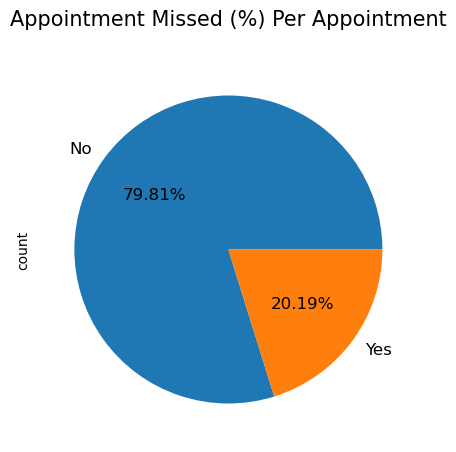

In [31]:
# Percentage of appointments missed vs. not missed
ax = df['Appointment_Missed'].value_counts().plot.pie(figsize=(5,5), autopct='%1.2f%%', fontsize=12)
ax.set_title('Appointment Missed (%) Per Appointment\n', fontsize=15);

This shows that 20.19% of all appointments are missed.

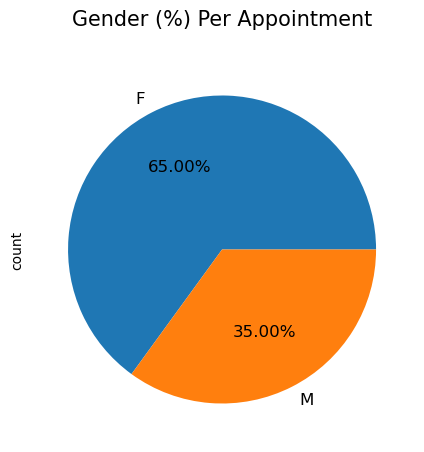

In [32]:
# Percentage of appointments by gender
ax = df['Gender'].value_counts().plot.pie(figsize=(5,5), autopct='%1.2f%%', fontsize=12)
ax.set_title('Gender (%) Per Appointment\n', fontsize=15);

This shows that 65% of all appointments are for females.

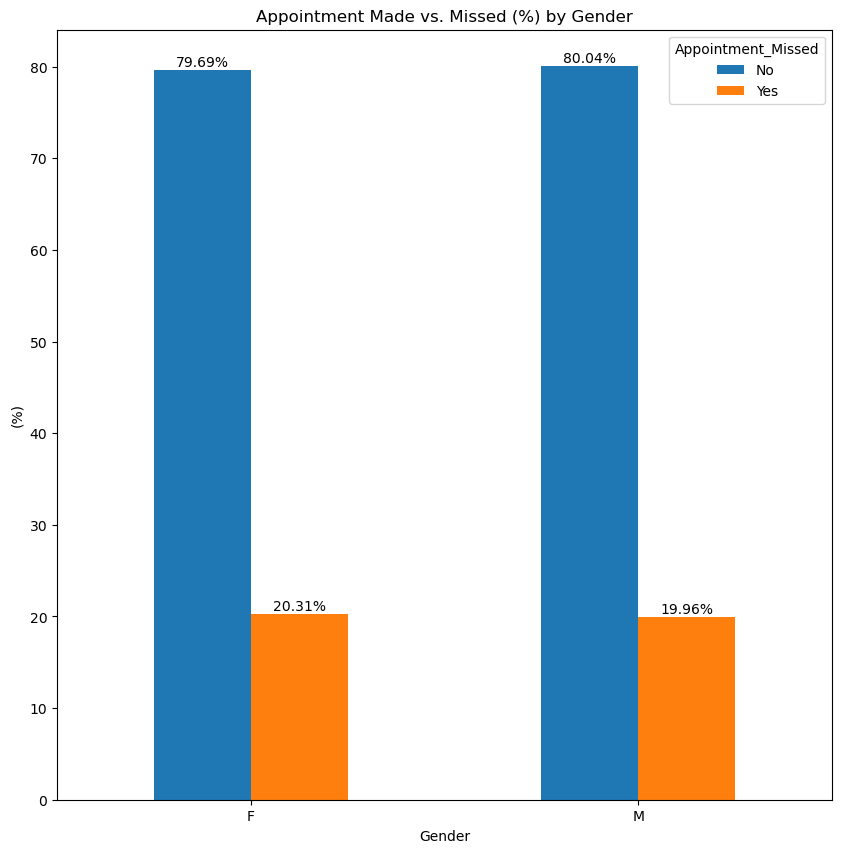

In [33]:
# Show which gender have higher percentage of missed vs made appointments
df_by_gender = pd.crosstab(df['Gender'], df.Appointment_Missed, normalize='index')
df_by_gender = np.round((df_by_gender * 100), decimals=2)

ax = df_by_gender.plot.bar(figsize=(10,10))
ax.set_xticklabels(df_by_gender.index, rotation=360)
ax.set_title('Appointment Made vs. Missed (%) by Gender')
ax.set_ylabel('(%)')
rects = ax.patches

for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2,
            height + 1,
            str(height)+'%',
            ha='center',
            va='center_baseline')

### Which days of the week have the highest percentage of missed appointments?

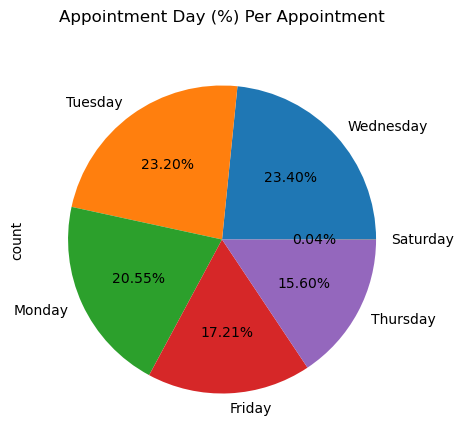

In [34]:
# Percentage of appointments by day
ax = df['Appointment_Day_Of_Week'].value_counts().plot.pie(figsize=(5,5), autopct='%1.2f%%')
ax.set_title('Appointment Day (%) Per Appointment\n');

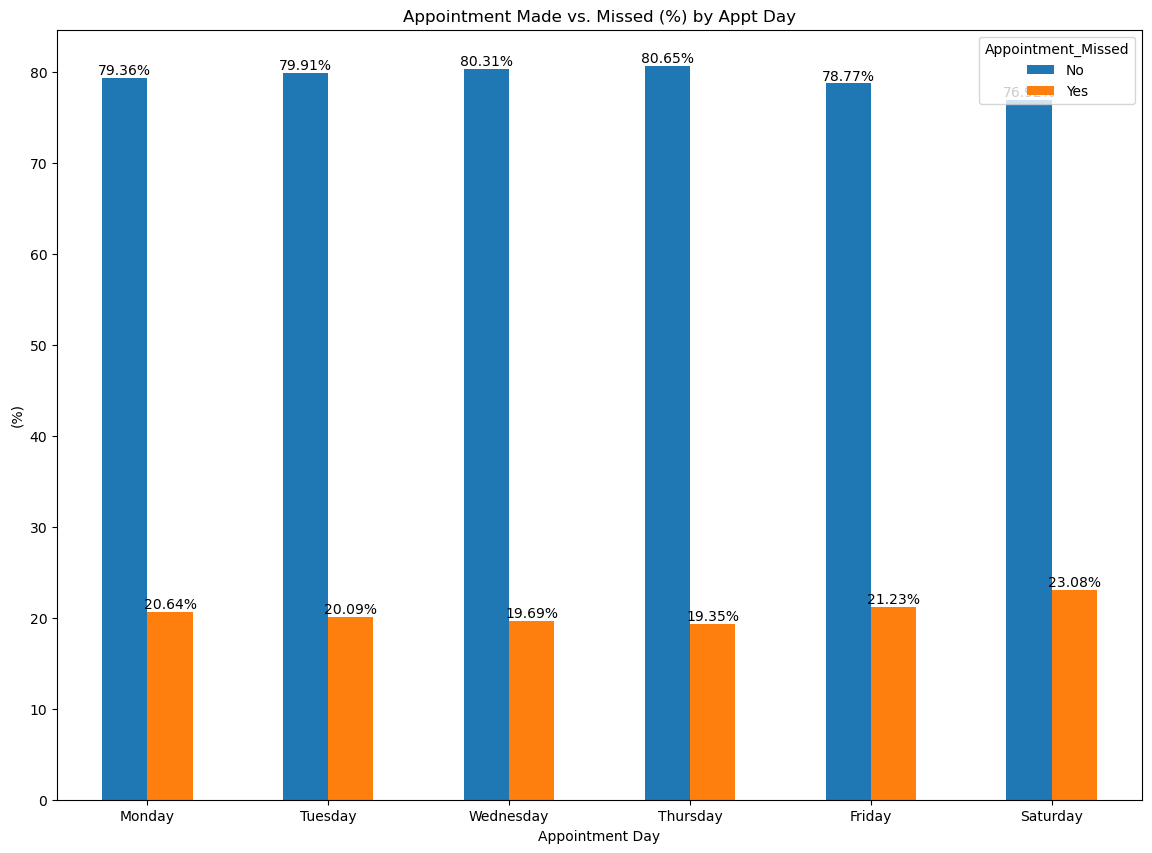

In [39]:
# Show which days have higher percentage of missed vs made appointments
df_by_appt_day = pd.crosstab(df['Appointment_Day_Of_Week'], df.Appointment_Missed, normalize='index')
df_by_appt_day = np.round((df_by_appt_day * 100), decimals=2)
days_in_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

ax = df_by_appt_day.reindex(days_in_order).plot.bar(figsize=(14,10), rot=0)

ax.set_title('Appointment Made vs. Missed (%) by Appt Day')
ax.set_xlabel('Appointment Day')
ax.set_ylabel('(%)')

# Set data labels for bars
rects = ax.patches

for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2,
            height + 1,
            str(height)+'%',
            ha='center',
            va='center_baseline')

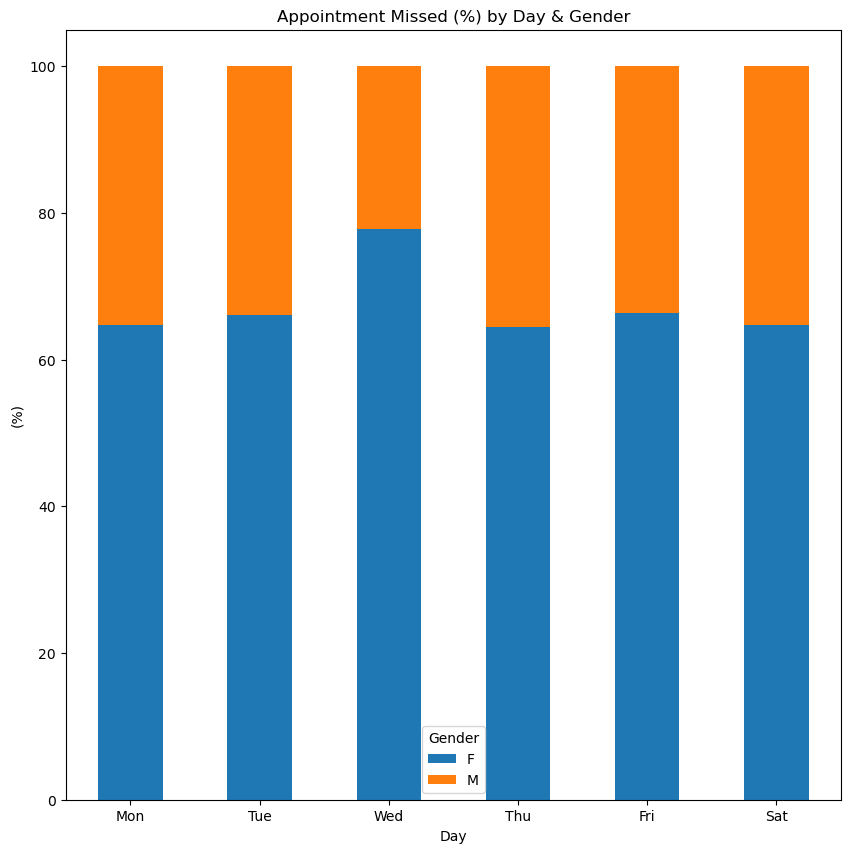

In [40]:
# Create bar chart to show missed appointments % for gender and day of week
df_missed_appt = df[df['Appointment_Missed'] == 'Yes']

df_gender_day = pd.crosstab(df_missed_appt['Appointment_Day_Of_Week'], df_missed_appt['Gender'], normalize='index')
df_gender_day = np.round(df_gender_day * 100, 2)
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']

ax = df_gender_day.plot.bar(stacked=True, figsize=(10,10))
ax.set_xticklabels(days, rotation=360) # Order labels in order of days of week versus order in data frame
ax.set_title('Appointment Missed (%) by Day & Gender')
ax.set_xlabel('Day')
ax.set_ylabel('(%)');

### Which age group has the highest percentage of missed appointments?

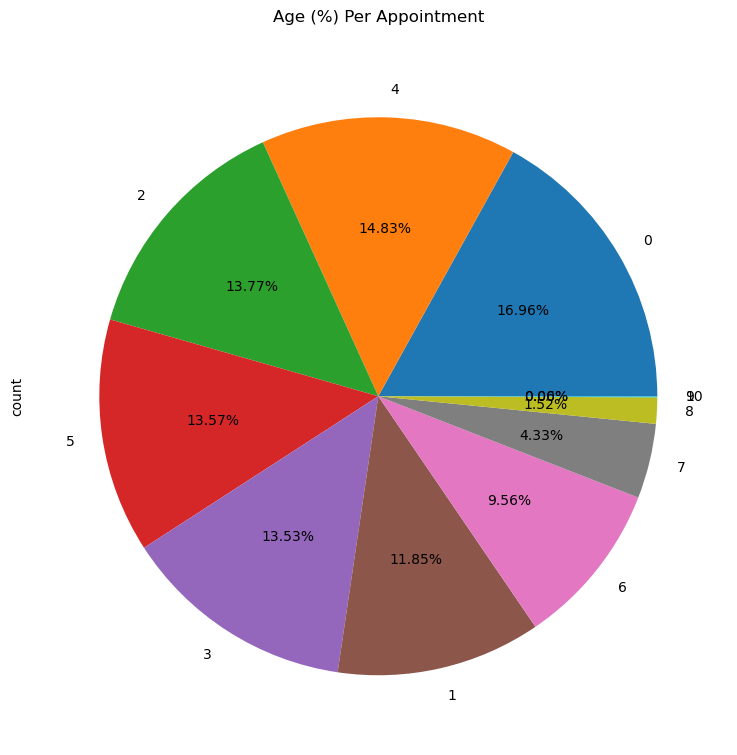

In [41]:
# Show percentage of appointments per age group
ax = df['Age'].value_counts().plot.pie(figsize=(9, 10), autopct='%1.2f%%')
ax.set_title('Age (%) Per Appointment\n');

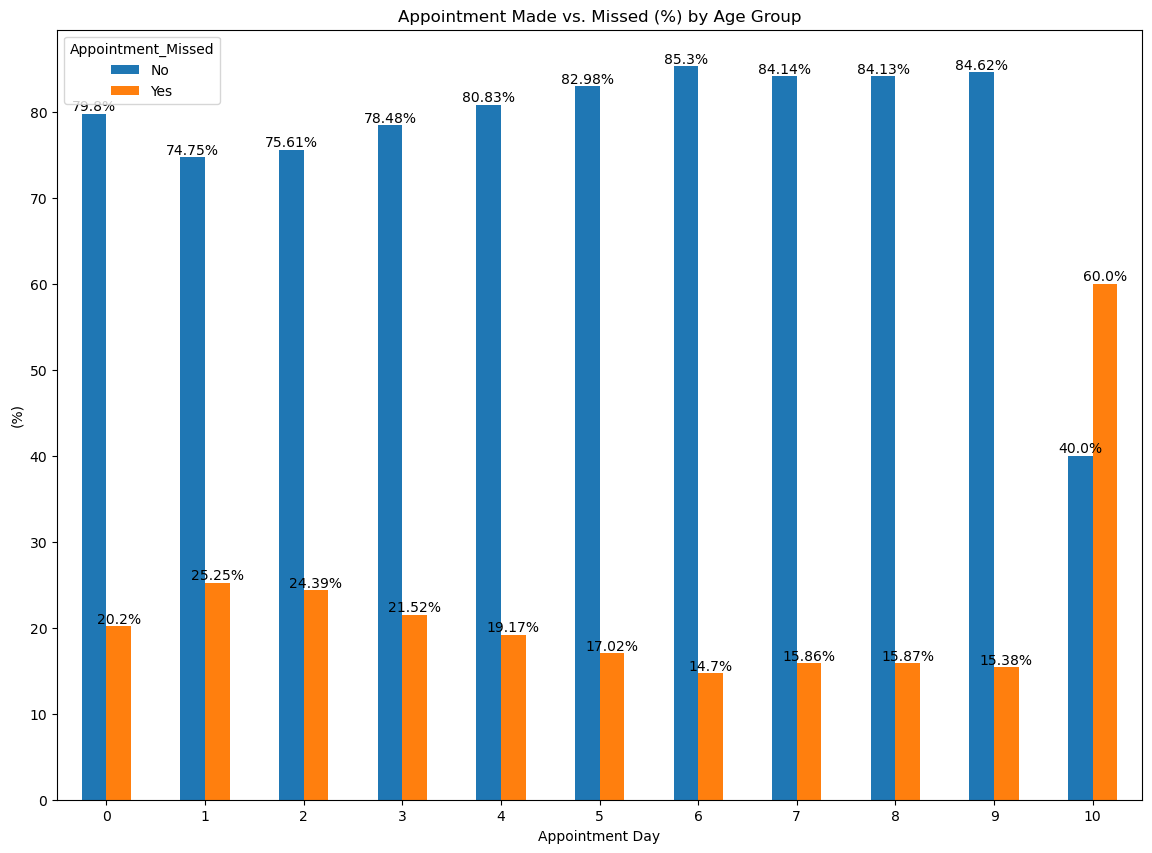

In [43]:
# Show which age groups have higher percentage of missed vs made appointments
df_by_age = pd.crosstab(df['Age'], df.Appointment_Missed, normalize='index')
df_by_age = np.round((df_by_age * 100), decimals=2)

ax = df_by_age.plot.bar(figsize=(14,10))
ax.set_xticklabels(df_by_age.index, rotation=360) # Order labels in order of days of week versus order in data frame
ax.set_title('Appointment Made vs. Missed (%) by Age Group')
ax.set_xlabel('Appointment Day')
ax.set_ylabel('(%)')

# Set data labels for bars
rects = ax.patches

for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2,
            height + 1,
            str(height)+'%',
            ha='center',
            va='center_baseline')

<a id='conclusions'></a>
## Conclusions

#### Appointments by Gender
From the analysis made we can see that females have the highest percentage of appointments and men show up to their appointments at a higher percentage of their appointments than women. 


#### Appointments by Day
Tuesday and Wednesday account for 47.60% of all appointments. There are no appointments on Sunday. Thursday and Saturday have the highest percentage of appointments made. Monday and Wednesday have the highest percentage of appointments missed.

#### Appointments by Age
Appointments for younger patients have a higher percentage of missed appointments than those of the older patients, excluding patients 100+ years old. Patients 100 years old or older miss 60% of their appointments. 


### Limitation
Analysis was done based on number of appointments and not by patients. Several of the records had to be removed due to data inaccuracies either in age or where the scheduled date was after the appointment day. The data is also limited in understanding why an appointment was missed. While the analysis can provide categorical insights, there were no inferential statistics performed during this analysis.  